In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


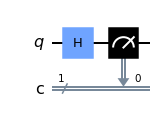

In [2]:
circuit = QuantumCircuit(1,1) 
circuit.h(0)
circuit.measure(0,0)
circuit.draw(output = 'mpl')

In [3]:
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

devices = provider.backends()
# Ha több qubites áramkört szeretnél futtatni, akkor érdemes az alábbi paranccsal dolgozni
#devices = provider.backends(filters=lambda x: x.configuration().n_qubits > 2
#and not x.configuration().simulator)
real_backend = least_busy(devices)
print(real_backend)

ibmq_armonk


In [4]:
job_dev = execute(circuit, backend=real_backend, shots=1024)
job_monitor(job_dev)

Job Status: job has successfully run


{'0': 516, '1': 508}


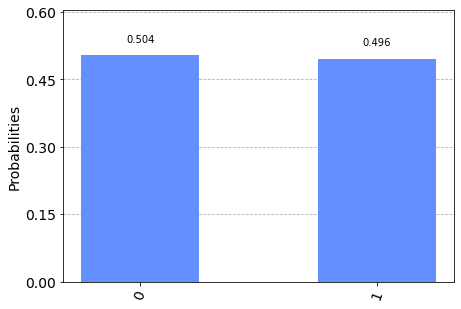

In [5]:
# Print the experimentally measured counts
exp_counts = job_dev.result().get_counts(circuit)
print(exp_counts)
# Plot the results.
plot_histogram(exp_counts)